# Transfer Learning VGG 16 using Keras

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 98s 2us/step


In [8]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=base_model.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 33 images belonging to 3 classes.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 [==============================] - 57s 19s/step - loss: 1.7275 - accuracy: 0.3676 - val_loss: 2.0948 - val_accuracy: 0.3030
Epoch 2/100
3/3 [==============================] - 51s 17s/step - loss: 0.8059 - accuracy: 0.6375 - val_loss: 1.2481 - val_accuracy: 0.4848
Epoch 3/100
3/3 [==============================] - 49s 17s/step - loss: 0.8964 - accuracy: 0.5712 - val_loss: 1.0061 - val_accuracy: 0.5758
Epoch 4/100
3/3 [==============================] - 49s 17s/step - loss: 0.3151 - accuracy: 0.9282 - val_loss: 2.0706 - val_accuracy: 0.3030
Epoch 5/100
3/3 [==============================] - 51s 18s/step - loss: 0.6020 - accuracy: 0.8056 - val_loss: 1.6897 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 51s 18s/step - loss: 0.3708 - accuracy: 0.8931 - val_loss: 0.9812 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 48s 17s/step - loss: 0.1766 - accuracy: 0.9716 - val_loss: 1.0309 - val_accuracy: 0.6061
Epoch 8/100
3/3 [===

3/3 [==============================] - 17s 6s/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.0607 - val_accuracy: 0.5758
Epoch 60/100
3/3 [==============================] - 18s 7s/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.0464 - val_accuracy: 0.5758
Epoch 61/100
3/3 [==============================] - 19s 7s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.0460 - val_accuracy: 0.6061
Epoch 62/100
3/3 [==============================] - 18s 7s/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.0360 - val_accuracy: 0.6061
Epoch 63/100
3/3 [==============================] - 19s 7s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.0559 - val_accuracy: 0.6061
Epoch 64/100
3/3 [==============================] - 20s 7s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.0956 - val_accuracy: 0.5758
Epoch 65/100
3/3 [==============================] - 19s 7s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.1464 - val_accuracy: 0.5758
Epoch 66/100
3/3 [===============

In [19]:
import matplotlib.pyplot as plt

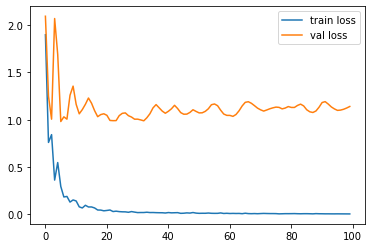

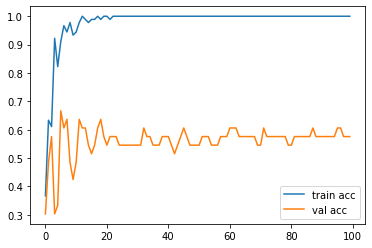

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[6.9141977e-02, 8.5194725e-01, 7.8910828e-02],
       [4.1435298e-01, 5.7603031e-01, 9.6167149e-03],
       [3.5519635e-03, 9.9381530e-01, 2.6328310e-03],
       [4.7634566e-01, 5.1063007e-01, 1.3024341e-02],
       [6.7047910e-03, 9.9228269e-01, 1.0125631e-03],
       [7.5523125e-04, 9.9634749e-01, 2.8971978e-03],
       [2.6621852e-02, 5.1648915e-03, 9.6821320e-01],
       [2.6813238e-03, 9.0271264e-02, 9.0704733e-01],
       [2.9688361e-01, 2.1826617e-01, 4.8485017e-01],
       [7.5523125e-04, 9.9634749e-01, 2.8971978e-03],
       [9.1457659e-01, 3.5980174e-03, 8.1825420e-02],
       [8.4054118e-01, 1.9074468e-02, 1.4038433e-01],
       [9.9503076e-01, 2.6046406e-03, 2.3646136e-03],
       [8.8485157e-01, 1.0141287e-01, 1.3735551e-02],
       [1.6336916e-02, 5.4732752e-01, 4.3633547e-01],
       [3.9740917e-01, 5.6351993e-02, 5.4623890e-01],
       [1.0660971e-03, 9.9801081e-01, 9.2310057e-04],
       [5.2159481e-05, 2.9668093e-01, 7.0326692e-01],
       [2.3868527e-02, 9.748

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2], dtype=int64)

In [26]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,y_pred))
print(confusion_matrix(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.23      0.30      0.26        10
           2       0.38      0.23      0.29        13

    accuracy                           0.18        33
   macro avg       0.20      0.18      0.18        33
weighted avg       0.22      0.18      0.19        33

[[0 7 3]
 [5 3 2]
 [7 3 3]]


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [29]:
result

array([[0., 0., 1.]], dtype=float32)

In [30]:
def correctclass(result):
    result = np.argmax(result, axis=1)
    if result[0] == 0:
        prediction = 'Bacterial leaf blight'
    elif result[0] == 1:
        prediction = 'Brown spot'
    else:
        prediction = 'Leaf smut'
    return prediction

In [31]:
print(correctclass(result))

Leaf smut


In [32]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0., 0., 1.]], dtype=float32)

In [33]:
print(correctclass(result))

Leaf smut


In [34]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0., 0., 1.]], dtype=float32)

In [35]:
print(correctclass(result))

Leaf smut
